##  Проект "Аналитика в Яндекс.Афише"
## Оглавление:
* [Цель проекта](#intent)
* 1 [Изучение, описание и обработка данных в таблице](#opening_processing_data)
* 2 [Отченты и метрики](#reports_metrics)
    * 2.1 [Продукт](#product)
        * 2.1.1 [DAU, WAU, MAU](#dau_wau_mau)
        * 2.1.2 [Посещения сайта](#visits)
        * 2.1.3 [Длина пользовательской сессии](#session_time)
        * 2.1.4 [Retention Rate](#retention_rate)
    * 2.2 [Продажи](#sales)
        * 2.2.1 [Время до первой покупки](#first_purchase)
        * 2.2.2 [Среднее количество покупок на одного клиента](#avg_purchases)
        * 2.2.3 [Среднея выручка с пользователя](#avg_bill)
        * 2.2.4 [Выручка с одного клиента (LTV](#ltv)
    * 2.3 [Маркетинг](#marketing)
        * 2.3.1 [Расходы на маркетинг](#costs)
        * 2.3.2 [Стоимость привлечения одного покупателя (CAC)](#cac)
        * 2.3.3 [Окупаемость маркетинговых трат (ROMI)](#romi)
* 3 [Вывод](#conclusion)

## Цель проекта:<a name="intent"></a>
На основе трех датасетов от Яндекс.Афиши за июнь 2017 - конец мая 2018 года определить как оптимизировать маркетинговые затраты. В датасетах содержатся логи сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка данных всех заказов за этот период, статистика рекламных расходов. Для выполнения задачи необходимо посчитать продуктовые и маркетинговые метрики, а также метрики электронной коммерции. В это входит:
> - Расчет DAU, WAU и MAU. Средние значения этих метрик за весь период и график изменения метрик во времени;
> - Определение сколько раз за день пользователи в среднем заходят на сайт, изменение этой метрики с течением времени;
> - Расчет средней продолжительности пользовательской сессии за весь период, ее распределение по пользователям;
> - Расчет Retention Rate с помощью когортного анализа;
> - Определение сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;
> - Расчет среднего количества покупок на одного клиента за определённый период с помощью когортного анализа;
> - Расчет средней выручки с пользователя, изменение этой метрики с течением времени;
> - Расчет накопительного LTV по когортам, сравнение LTV когорт;
> - Расчет расходов на маркетинг, их распределение по источникам и изменение во времени;
> - Определение стоимости привлечения одного покупателя из каждого источника трафика;
> - Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам и их изменение во времени;
> - Рассчет ROMI по когортам, сравнение окупаемости за одинаковые периоды жизни когорт.

## 1 Загрузка, описание и обработка данных в таблицах<a name="opening_processing_data"></a>
Импортируем необходимые для проекта библиотеки и сохраним данные в трех таблицах.

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
visits = pd.read_csv('d:/files/praktikum_csv_files/visits_log.csv')
orders = pd.read_csv('d:/files/praktikum_csv_files/orders_log.csv')
costs = pd.read_csv('d:/files/praktikum_csv_files/costs.csv')
display(visits.head())
display(visits.info())
display(orders.head())
display(orders.info())
display(costs.head())
display(costs.info())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Пропусков в таблицах нет. Во всех трех таблицах изменим тип данных в колонках с датами на корректный, также приведем к единому регистру названия колонок в таблицах visits и orders и заменим пробелы в них на нижний слэш. После этого проверим есть ли в таблицах дубликаты

In [156]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d %H:%M:%S')
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

In [157]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

## 2 Отчеты и метрики<a name="reports_metrics"></a>
### 2.1 Продукт<a name="product"></a>
#### 2.1.1 DAU, WAU, MAU<a name="dau_wau_mau"></a>
Определим сколько людей пользуются Яндекс.Афишей в день, неделю и месяц. Сначала в таблице с данными о посещениях выделим в отдельные колонки год, месяц, неделю и дату начала сессии из соответствующей колонки.

In [158]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27


Рассчитаем средние значения количества уникальных пользователей за день (DAU), неделю (WAU) и месяц (MAU). Для этого сгруппируем таблицу с визитами по соответствующим периодам и для каждого из них рассчитаем количество уникальных пользователей. Затем рассчитаем среднее этих показателей за весь период в разрезе устройств.

In [159]:
dau_desk = visits.query('device == "desktop"').groupby('session_date').agg({'uid': 'nunique'}).mean()
dau_touch = visits.query('device == "touch"').groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_desk = visits.query('device == "desktop"').groupby('session_week').agg({'uid': 'nunique'}).mean()
wau_touch = visits.query('device == "touch"').groupby('session_week').agg({'uid': 'nunique'}).mean()
mau_desk = visits.query('device == "desktop"').groupby('session_month').agg({'uid': 'nunique'}).mean()
mau_touch = visits.query('device == "touch"').groupby('session_month').agg({'uid': 'nunique'}).mean()
display('Среднее количество уникальных пользователей устройств desktop в день', dau_desk)
display('Среднее количество уникальных пользователей устройств touch в день', dau_touch)
display('Среднее количество уникальных пользователей устройств desktop в неделю', wau_desk)
display('Среднее количество уникальных пользователей устройств touch в неделю', wau_touch)
display('Среднее количество уникальных пользователей устройств desktop в месяц', mau_desk)
display('Среднее количество уникальных пользователей устройств touch в месяц', mau_touch)

'Среднее количество уникальных пользователей устройств desktop в день'

uid    659.244505
dtype: float64

'Среднее количество уникальных пользователей устройств touch в день'

uid    252.873278
dtype: float64

'Среднее количество уникальных пользователей устройств desktop в неделю'

uid    4135.754717
dtype: float64

'Среднее количество уникальных пользователей устройств touch в неделю'

uid    1637.264151
dtype: float64

'Среднее количество уникальных пользователей устройств desktop в месяц'

uid    16724.916667
dtype: float64

'Среднее количество уникальных пользователей устройств touch в месяц'

uid    6825.916667
dtype: float64

Далее сделаем три группировки таблицы с посещениями: по дате и устройствам, неделе и устройствам, месяцу и устройствам. Для каждой группировки посчитаем количество уникальных пользователей. Полученные данные отобразим на графиках, показывающих динамику этих показателей за рассматриваемый нами период.

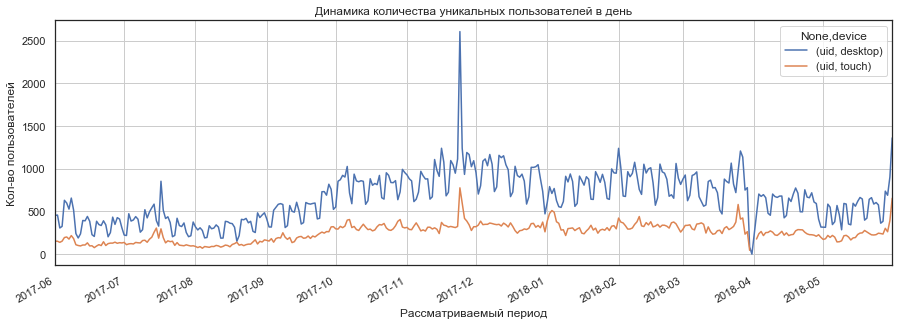

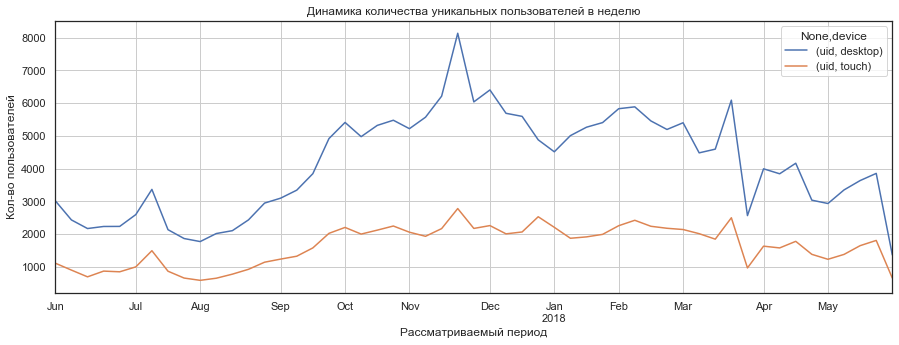

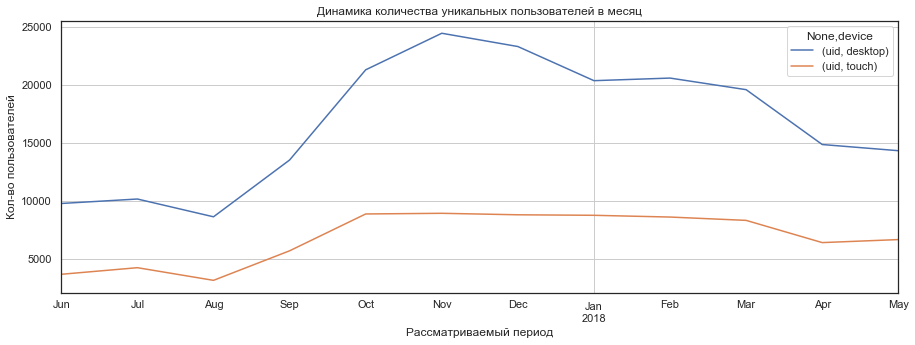

In [160]:
(visits.groupby(['session_date', 'device']).agg({'uid': 'nunique'}).unstack()
.plot(title='Динамика количества уникальных пользователей в день', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Кол-во пользователей')

(visits.groupby(['session_week', 'device']).agg({'uid': 'nunique'}).unstack()
 .plot(title='Динамика количества уникальных пользователей в неделю', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Кол-во пользователей')

(visits.groupby(['session_month', 'device']).agg({'uid': 'nunique'}).unstack()
 .plot(title='Динамика количества уникальных пользователей в месяц', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Кол-во пользователей')
plt.show()

Количество уникальных пользователей по всем трем метрикам начало расти с августа 2017. Пиковые значения пришлись на ноябрь 2017 года. Аномально резкое увеличение количества уникальных пользователей в день во второй половине ноября можно заметить на соответствующем графике для desktop устройств. Возможно в это время начались продажи билетов на редкое и большое событие. На этом же графике можно заметить падение количества пользователей до нуля в марте 2018 года, похоже в какой-то из дней сервис не работал. После ноября 2017 трендом было снижение количества уникальных пользователей. Можно отметить, что пользователей с устройствами touch на протяжении всего периода пропорционально меньше, чем пользователей с устройствами desktop. В последний месяц рассматриваемого периода все три метрики были ниже соответствующих средних значений за весь период. В среднем за весь период, по всем трем метрикам уникальных пользователей, людей с устройствами desktop примерно в 3 раза больше, чем людей с устройствами touch.

#### 2.1.2 Посещения сайта<a name="visits"></a>

Далее определим сколько пользовательских сессий в день проходило на Яндекс.Афише и какая была динамика у этого показателя. Для этого сгруппируем посещения по дате и используемым устройствам. Для каждой группировки посчитаем количество сессий по id пользователя и количество уникальных пользователей в день. Построим график, показывающий динамику количества сессий в день за весь рассматриваемый период. Также найдем среднее значение этого показателя за весь период.

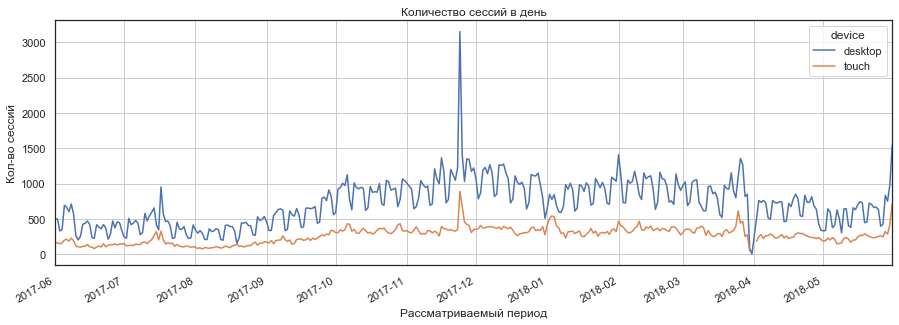

In [161]:
sessions = visits.groupby(['session_date', 'device']).agg({'uid': 'count'})
sessions.columns = ['n_sessions']
(sessions.unstack()
 .plot(y='n_sessions', title='Количество сессий в день', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Кол-во сессий')
plt.show()

In [162]:
(display('Среднее количество сессий устройств desktop в день',
         visits.query('device == "desktop"').groupby('session_date').agg({'uid': 'count'}).mean()))
(display('Среднее количество сессий устройств touch в день',
         visits.query('device == "touch"').groupby('session_date').agg({'uid': 'count'}).mean()))

'Среднее количество сессий устройств desktop в день'

uid    721.337912
dtype: float64

'Среднее количество сессий устройств touch в день'

uid    266.757576
dtype: float64

Так как количество посещений сайта за день напрямую связано с количеством пользователей, то и графики из изменения похожи. В количестве посещений сайта за день также наблюдаем постепенный рост с августа 2017 года с дальнейшим снижением после ноября 2017. Соответственно и посещений с устройств desktop здесь также больше. Среднее количество посещений сайта в день с устройств desktop - 721, с устройств touch - 267, по соотношению этих данных со средним количеством уникальных пользователей в день видно, что на одного уникального пользователя приходится чуть больше одной сессии в день. Схожесть графиков говорит о том, что такое соотношение сохранялось на протяжении всего рассматриваемого периода.

#### 2.1.3 Длина пользовательской сессии<a name="session_time"></a>
Теперь определим как распределены значения по длине пользовательской сессии. Для этого в таблице с посещениями вычтем из даты начала сессии дату ее окончания, полученную разницу переведем в минуты. Для полученной колонки с длиной сессии построим гистограммы распределения значения для пользователей desktop и touch и найдем средние значения длины сессии за весь период.

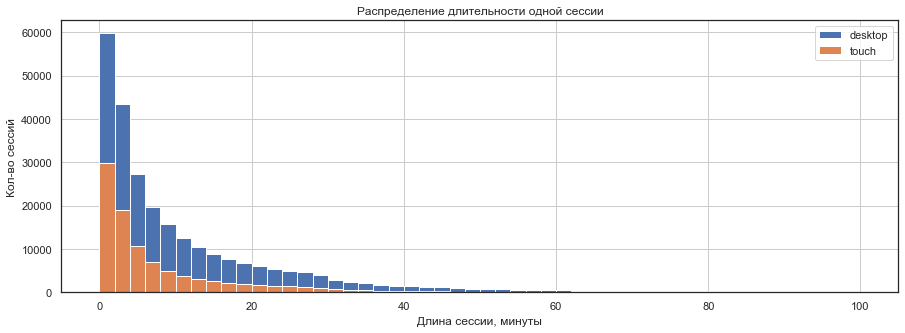

In [163]:
visits['session_duration_min'] = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60
visits[visits['device'] == 'desktop']['session_duration_min'].hist(bins=50, range=(0, 100), figsize=(20, 5))
visits[visits['device'] == 'touch']['session_duration_min'].hist(bins=50, range=(0, 100), figsize=(15, 5))
plt.xlabel('Длина сессии, минуты')
plt.ylabel('Кол-во сессий')
plt.legend(['desktop', 'touch'])
plt.title('Распределение длительности одной сессии')
plt.show()

Распределение значений не выглядит как нормальное, поэтому за весь период корректнее рассматривать не среднее значение, а наиболее часто встречающееся.

In [164]:
(display('Наиболее часто встречаемая длина пользовательской сессии на устройствах desktop',
         visits[visits['device'] == 'desktop']['session_duration_min'].mode()))
(display('Наиболее часто встречаемая длина пользовательской сессии на устройствах touch',
         visits[visits['device'] == 'touch']['session_duration_min'].mode()))

'Наиболее часто встречаемая длина пользовательской сессии на устройствах desktop'

0    1.0
dtype: float64

'Наиболее часто встречаемая длина пользовательской сессии на устройствах touch'

0    1.0
dtype: float64

Большинство пользователей проводили на сайте не больше 20 минут, отдельные пользователи пробыли на сайте значительно дольше. А самой частой длиной пользовательской сессии для обоих типов устройств является одна минута. Маловероятно, что за такой срок можно купить билет или ознакомиться с билетной программой. Возможно что-то не так с рекламным источником, который дает этот трафик.

#### 2.1.4 Retention Rate<a name="retention_rate"></a>

Определим как часто люди возвращаются, используем для этого когортный анализ. Сначала сгруппируем таблицу посещений по id пользователя и для каждого найдем дату первого посещения. Когорты будут сформированы по месяцам, в которые пользователи совершили первое посещение Яндекс.Афиши.

In [165]:
first_activity_date = visits.groupby('uid')['session_date'].min()
first_activity_date.name = 'first_activity_date'

Полученную series объединим с таблицей посещений по столбцу uid, таким образом в таблице visits появится новая колонка, где для каждой активности пользователя будет указана дата его первого посещения.

In [166]:
visits = visits.join(first_activity_date, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_duration_min,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,18.0,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,28.0,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,24.0,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0.0,2017-12-27


Далее для каждой активности пользователей в таблице visits определим месяц времени жизни когорты, в которой находится пользователь. Сначала выделим из столбцов first_activity_date и session_date месяцы. Вызовем метод astype() и преобразуем значения столбцов к типу 'datetime64[M]'.

In [167]:
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['month'] = visits['session_date'].astype('datetime64[M]')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 12 columns):
device                  359400 non-null object
end_ts                  359400 non-null datetime64[ns]
source_id               359400 non-null int64
start_ts                359400 non-null datetime64[ns]
uid                     359400 non-null uint64
session_month           359400 non-null datetime64[ns]
session_week            359400 non-null datetime64[ns]
session_date            359400 non-null datetime64[ns]
session_duration_min    359400 non-null float64
first_activity_date     359400 non-null datetime64[ns]
first_activity_month    359400 non-null datetime64[ns]
month                   359400 non-null datetime64[ns]
dtypes: datetime64[ns](8), float64(1), int64(1), object(1), uint64(1)
memory usage: 32.9+ MB


Определим время жизни вычитанием из месяца активности месяца первого визита. Полученное в днях значение переведем в месяцы, разделив на np.timedelta64(1,'M'), затем округлим и изменим тип данных на целочисленный. Время жизни запишем в новую колонку cohort_lifetime. 

In [168]:
visits['cohort_lifetime'] = visits['month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_duration_min,first_activity_date,first_activity_month,month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,18.0,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,28.0,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,24.0,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0.0,2017-12-27,2017-12-01,2017-12-01,0


Группировкой таблицы с посещениями по месяцу первой активности и времени жизни когорты посчитаем сколько пользователей продолжали пользоваться сервисом каждый месяц. Полученную таблицу сохраним в новую переменную

In [169]:
cohorts_visits = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_visits.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


В переменную initial_users_count сохраним данные о месяце образования когорты и количестве пользователей в ней.

In [170]:
initial_users_count = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

К таблице cohorts_visits с количеством пользователей когорты в каждый месяц ее жизни присоединим данные о количестве пользователей когорты в нулевой месяц, содержащиеся в таблице initial_users_count. Затем разделим колонки значения колонки uid на соответствующие значения колонки cohort_users, чтобы получтить информацию о доле пользователей когорты, продолжающих пользоваться сервисом (коэффициент удержания). Полученное значение сохраним в новую колонку retention.

In [171]:
cohorts_visits = cohorts_visits.merge(initial_users_count, on='first_activity_month')
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']

Таблицу cohorts_visits сведем к таблице, где в индексах будет месяц образования когорты, колонками - время жизни когорты, а значениями - коэффициент удержания. Для полученной таблицы построим тепловую карту. Также добавим к таблице среднее значение коэффициента удержания для всех когорт по каждому месяцу жизни.

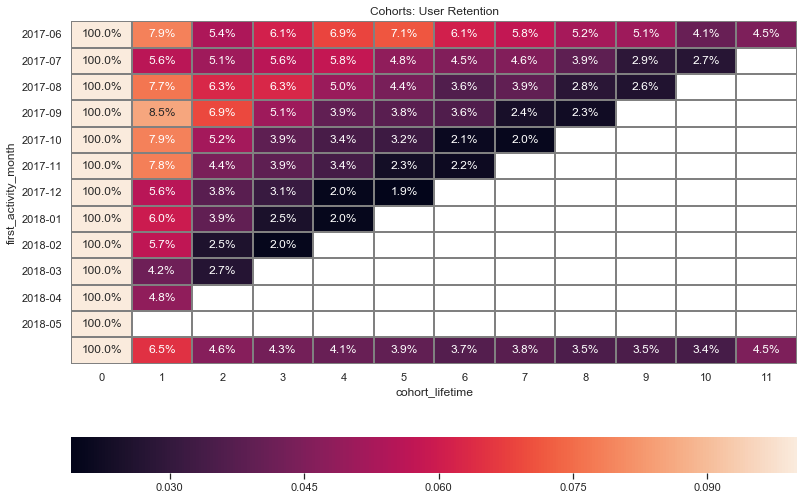

In [172]:
retention_pivot = (cohorts_visits
                   .pivot_table(index='first_activity_month', columns='cohort_lifetime', values='retention', aggfunc='sum'))
avg_retention_by_lifetime = retention_pivot.mean(axis=0)
avg_retention_by_lifetime.name = 'avg_retention'
yticks = retention_pivot.index.strftime('%Y-%m')
retention_pivot = retention_pivot.append(avg_retention_by_lifetime)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
(sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', yticklabels=yticks, vmax=.1,
             cbar_kws = dict(use_gridspec=False, location='bottom')))
plt.yticks(rotation=0)
plt.show()

Уже на второй месяц из рассматриваемых когорт на сайт вернулись в среднем 6.5 % пользователей. К шестому месяцу жизни средний коэффициент снизился до 3.7 %. То есть больше 90 % пользователей каждой когорты посещают Яндекс.Афишу была один раз и больше на нее не возвращаются. Возможно что-то, например цены билетов, отпугнуло пользователей и они не возвращаются для сравнения цен.

Продуктовые метрики показали рост числа уникальных пользователей и количества посещений сайта до ноября 2017 года. Это справедливо и для пользователей с типами устройствами desktop и для пользователей touch. Пользователей с устройствами desktop было пропорционально больше на протяжении всего периода. Необычным выглядит распределение значений длины пользовательской сессии, так как самая часто встречаемая длина сессии 1 минута. Такая длина сессии и низкий коэффициент удержания пользователей должны быть дополнительно изучены, ведь это могут быть как проблемы с сервисом так и с рекламным источником или источниками.

### 2.2 Продажи<a name="sales"></a>
#### 2.2.1 Время до первой покупки<a name="first_purchase"></a>

Для ответа на вопрос когда люди начинают покупать сначала сгруппируем таблицу с информацией о заказах по id пользователя и для каждого из них найдем дату первой покупки.

In [173]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_date']
first_orders.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Таблицу с посещениями сервиса сгруппируем по id пользователя и для каждого из них найдем дату первого посещения. Полученную таблицу сохраним под названием time_til_first_order и присоединим к ней таблицу с датой первого заказа по колонке uid.

In [174]:
time_til_first_order = visits.groupby('uid').agg({'start_ts': 'min'})
time_til_first_order = time_til_first_order.merge(first_orders, on='uid')          
time_til_first_order.head()

,uid,start_ts,first_order_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


В полученной таблице time_til_first_order для каждого пользователя содержится информация о дате первого посещения сайта и дате первой покупки. Вычтем из даты первого заказа дату первого посещения сайта, полученную разницу переведем в минуты и сохрани в новую колонку в этой же таблице.

In [175]:
time_til_first_order['minutes'] = ((time_til_first_order['first_order_date'] - time_til_first_order['start_ts']).dt.seconds) / 60
time_til_first_order.head()

,uid,start_ts,first_order_date,minutes
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Для колонки, показывающей сколько часов прошло от первого посещения сайта до первой покупки клиента, рассмотрим описание распределения значений.

In [176]:
time_til_first_order['minutes'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: minutes, dtype: float64

Половине всех пользователей достаточно 16 минут с момента первого посещения сайта, чтобы купить на нем билеты. Еще четверть пользователей укладывается чуть больше, чем в четыре часа. А в целом всем пользователям на это хватает суток.

Чтобы увидеть как изменялось время до первой покупки во времени построим соответствующий график. Сначала выделим в отдельную колонку дату из колонки start_ts, после чего сгруппируем таблицу по этой дате, а для каждой группировки выведем медиану времени до первого заказа. По сгруппированной таблице построим график.

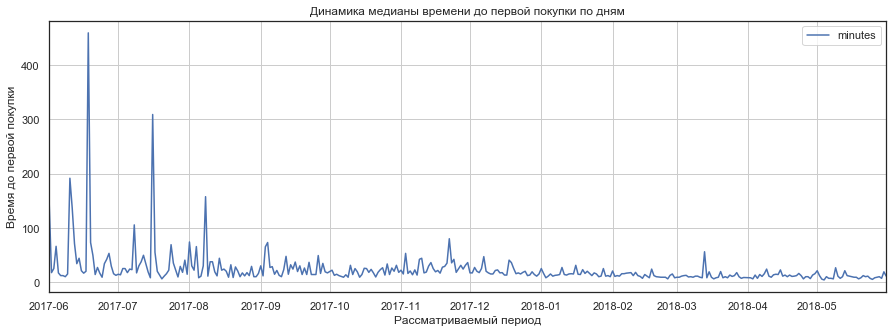

In [177]:
time_til_first_order['session_date'] = time_til_first_order['start_ts'].dt.date
(time_til_first_order.groupby('session_date').agg({'minutes': 'median'})
 .plot(title='Динамика медианы времени до первой покупки по дням', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Время до первой покупки')
plt.show()

В начале рассматриваемого периода покупка на сайте занимала у пользователей больше времени, возможно интерфейс сайта был не совсем удобен. В дальнейшем время от первого посещения сайта до первой покупки только уменьшалось.

#### 2.2.2 Среднее количество покупок на одного клиента<a name="avg_purchases"></a>

Чтобы определить среднее количество покупок на одного клиента используем когортный анализ. Сначала из колонки buy_ts в отдельную колонку выделим дату.

In [178]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders.head()

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


Далее в series first_buy_date сохраним таблицу orders, сгруппированную по колонке uid, где для каждого uid найдем дату первой покупки. Полученную series присоединяем к таблице с заказами по колонке uid.

In [179]:
first_buy_date = orders.groupby('uid')['buy_date'].min()
first_buy_date.name = 'first_buy_date'
orders = orders.join(first_buy_date, on='uid')
orders.head()

,buy_ts,revenue,uid,buy_date,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


После этого создадим колонки first_buy_month и month из соответствующих колонок с датой первой покупки и датой покупки.

In [180]:
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')
orders['month'] = orders['buy_date'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,buy_date,first_buy_date,first_buy_month,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


Для каждой покупки рассчитаем время жизни когорты, в которое была совершена эта покупка. Для этого из даты покупки вычитаем дату первой покупки. Полученные значения пересчитываем в месяцы, округляем их и изменяем их тип на целочисленный.

In [181]:
orders['cohort_lifetime'] = orders['month'] - orders['first_buy_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,buy_date,first_buy_date,first_buy_month,month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0


Чтобы получить данные о количестве покупателей в каждый месяц жизни когорты сгруппируем таблицу с заказами по месяцу образования когорты и колонке с временем ее жизни, для каждой группы рассчитаем количество уникальных пользователей и количество покупок. Полученную талицу сохраняем в cohorts_orders.

In [182]:
cohorts_orders = orders.groupby(['first_buy_month', 'cohort_lifetime']).agg({'uid':'nunique', 'revenue': 'count'}).reset_index()
cohorts_orders = cohorts_orders.rename(columns={'uid':'buyers', 'revenue': 'purchases'})
cohorts_orders.head()

,first_buy_month,cohort_lifetime,buyers,purchases
0,2017-06-01,0,2023,2354
1,2017-06-01,1,61,177
2,2017-06-01,2,50,174
3,2017-06-01,3,54,226
4,2017-06-01,4,88,292


Далее в initial_buyers_count сохраняем строчки из таблицы cohorts_orders, где указано количество покупателей в месяц образования когорты. К таблице cohorts_orders добавляем колонку с общим количеством покупателей каждой когорты, присоединяя таблицу initial_buyers_count по колонке с месяцем образования когорты.

In [183]:
initial_buyers_count = cohorts_orders[cohorts_orders['cohort_lifetime'] == 0][['first_buy_month','buyers']]
initial_buyers_count = initial_buyers_count.rename(columns={'buyers':'cohort_buyers'})
cohorts_orders = cohorts_orders.merge(initial_buyers_count, on='first_buy_month')
cohorts_orders.head()

,first_buy_month,cohort_lifetime,buyers,purchases,cohort_buyers
0,2017-06-01,0,2023,2354,2023
1,2017-06-01,1,61,177,2023
2,2017-06-01,2,50,174,2023
3,2017-06-01,3,54,226,2023
4,2017-06-01,4,88,292,2023


Для каждого месяца жизни когорты рассчитаем среднее количество покупок, приходящееся на одного покупателя когорты. Количество покупок делим на количество покупателей когорты, полученные значения сохраняем в новую колонку. Далее на основе таблицы с когортами строим сводную таблицу, где индексами будут месяца образования когорт, колонками - месяца их жизни, значениями - среднее количество покупок для одного покупателя. По сводной таблице строим тепловую карту и добавим усредненные значений для когорт за каждый месяц жизни.

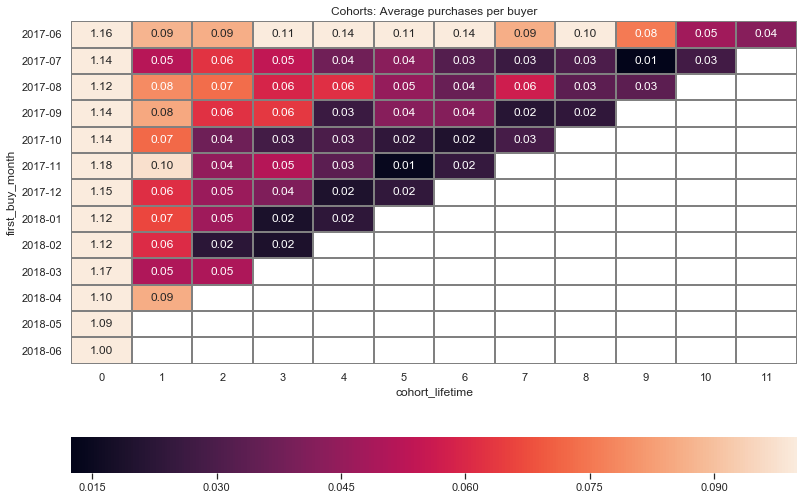

In [184]:
cohorts_orders['purchases_per_buyer'] = cohorts_orders['purchases'] / cohorts_orders['cohort_buyers']
purchases_per_buyer_pivot = (
    cohorts_orders.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='purchases_per_buyer', aggfunc='sum')
)
yticks_purch = purchases_per_buyer_pivot.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average purchases per buyer')
(sns.heatmap(purchases_per_buyer_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', yticklabels=yticks_purch, 
             vmax=.1, cbar_kws = dict(use_gridspec=False, location='bottom')))
plt.show()

Уже на второй месяц жизни каждой когорты на одного покупателя из нее приходится меньше одной десятой заказа. А значит и среди покупателей очень малая часть возвращается для повторных покупок. Возможно покупатели приходят разово только за спец предложениями и у сервиса пока не получилось стать для них приоритетным.

#### 2.2.3 Среднея выручка с пользователя<a name="avg_bill"></a>

Рассчитаем средний чек покупок, а чтобы увидеть изменение среднего чека по времени сгруппируем таблицу с заказами по месяцу заказа и id рекламного источника. Для каждой группы рассчитаем средний чек и построим график его изменения во времени.

In [185]:
orders['revenue'].mean()

4.999646930477041

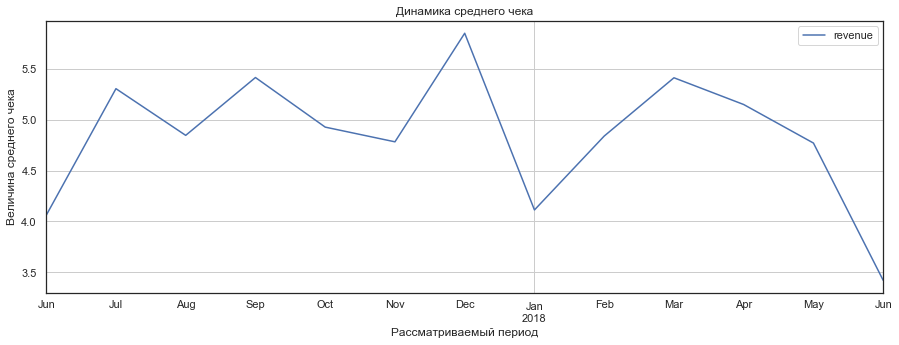

In [186]:
(orders.groupby('month').agg({'revenue': 'mean'})
 .plot(y='revenue', title='Динамика среднего чека', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Величина среднего чека')
plt.show()

Средний чек за весь рассматриваемый период составил 5 условных единиц. За рассматриваемый период времени величина среднего чека также держалась в диапазоне от 4 до 6 условных единиц.

#### 2.2.4 Выручка с одного клиента (LTV)<a name="ltv"></a>

Чтобы определить сколько денег приносят покупатели рассчитаем LTV с помощью когортного анализа. Чтобы разделить покупателей на когорты, сгруппируем таблицу с заказами по id пользователей и для каждого найдем месяц первой покупки. Сохраним полученную таблицу в переменной first_orders.

In [187]:
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


В переменной cohort_sizes сохраним таблицу с количеством покупателей в каждой когорте за рассматриваемый период. Для этого таблицу с заказами сгруппируем по месяцу первой покупки и для каждой группировки найдем количество уникальных покупателей.

In [188]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Объединяем таблицу с заказами и таблицу с датой первого заказа по колонке uid. Полученную таблицу сохраняем в переменной orders_new.

In [189]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,buy_date,first_buy_date,first_buy_month,month,cohort_lifetime,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01


Далее таблицу orders_new группируем по месяцу первого заказа и по месяцу каждого заказа, а для каждой группы находим суммарную выручку. Полученную таблицу сохраняем как cohorts_orders.

In [190]:
cohorts_orders = orders_new.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts_orders.head()

,first_order_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Таблицу cohorts_orders объединяем с таблицей cohort_sizes по колонке first_order_month. Полученную таблице сохраняем как report. Далее в таблице report находим возраст когорты, в который была сделана каждая покупка. Для этого из месяца покупки вычитаем месяц первой покупки и делим на np.timedelta64(1, 'M'). Полученные значения сохраняем в колонке age, округляем и изменяем тип данных на целочисленный.

In [191]:
report = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
report['age'] = (report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Теперь вычисляем ltv, для этого разделим выручку когорты с когорты за каждый месяц на количество человек в когорте. Полученные значения сохраняем в колонке ltv. Из таблицы report делаем сводную, где в индексе будут месяца образования когорт, в колонках время жизни когорты, а значениями ltv. Сводную таблицу сохраняем, рассчитав накопительный ltv и строим по ней тепловую карту. Также добавим усредненный ltv для всех когорт за каждый месяц жизни.

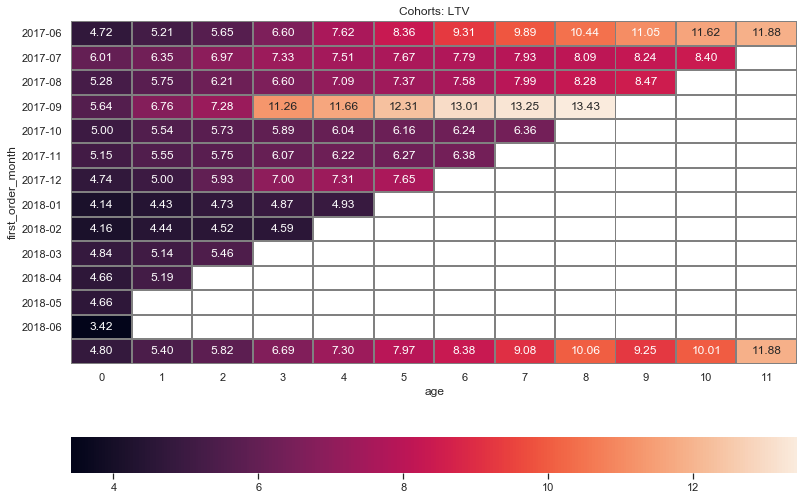

In [192]:
report['ltv'] = report['revenue'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(decimals=2)
output_cum = output.cumsum(axis=1).round(2)
avg_ltv_by_lifetime = output_cum.mean(axis=0)
avg_ltv_by_lifetime.name = 'avg_ltv'
yticks_ltv = output_cum.index.strftime('%Y-%m')
output_cum = output_cum.append(avg_ltv_by_lifetime)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
(sns.heatmap(output_cum, annot=True, fmt='.2f', linewidths=1, linecolor='gray', yticklabels=yticks_ltv,
             cbar_kws = dict(use_gridspec=False, location='bottom')))
plt.show()

Из когорт, существующих 6 и более месяцев, выделяется две. В сентябрьской когорте уже на третий месяц жизни ltv превысил 11 условных единиц, тогда как у остальных на этот период он был от 5 до 8. Когорта июня 2017 является второй, в которой на шестой месяц ltv был больше 9 условных единиц. Возможно есть закономерности, которые объясняют больший ltv этих когорт, и их изучение может помочь в увеличении ltv остальных когорт. Средний ltv когорт, проживших минимум полгода почти удвоился в сравнении с месяцем образования когорт и составляет 8.38 условных единиц. Не быстрый рост ltv обусловлен тем, что совершать покупки продолжает очень малая часть пользователей.

Метрики продаж показывают, что на протяжении всего периода пользователям требовалось всё меньше времени с первого посещения сайта до первой покупки на нем. Но, как и с посещениями, очень небольшая часть покупателей делала повторные покупки, это показывает среднее количество покупок, приходящееся на одного пользователя каждой когорты - меньше одного заказа. Средний чек за рассматриваемый период не имел тренда к уменьшению или увеличению и держался в диапазоне 4 - 6 условных единиц. Но при этом средний ltv по когортам, прожившим минимум полгода, составил чуть больше 8 условных единиц. Что также показывает очень маленькое число тех, кто постоянно пользуется Яндекс.Афишей.

### 2.3 Маркетинг<a name="marketing"></a>
#### 2.3.1 Расходы на маркетинг<a name="costs"></a>
Рассмотрим расходы на маркетинг. Сначала рассчитаем сколько всего было потрачено за рассматриваемый период и построим столбчатую диаграмму распределения трат по рекламным источникам.

In [193]:
costs['costs'].sum()

329131.62

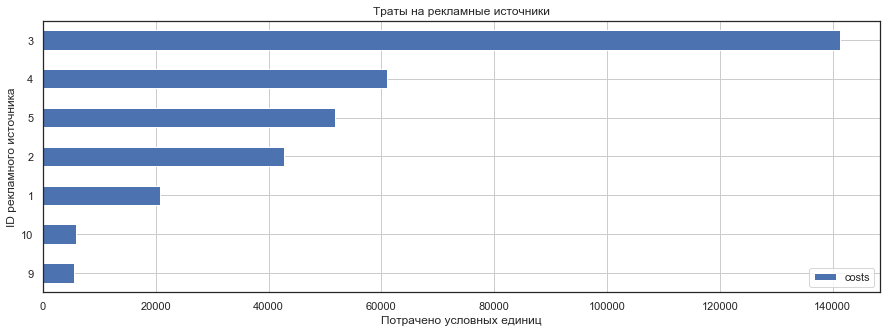

In [194]:
(costs.groupby('source_id').agg({'costs': 'sum'}).sort_values('costs')
 .plot(y='costs', kind='barh', title='Траты на рекламные источники', grid=True, figsize=(15, 5)))
plt.xlabel('Потрачено условных единиц')
plt.ylabel('ID рекламного источника')
plt.show()

Всего за рассматриваемый период времени на маркетинг было потрачено 329 тысяч условных единиц. Из них 140 тысяч были потрачены на источник 3, траты на остальные источники были значительно меньше. Сравним эту диаграмму с распределением посещений из рекламных источников. Построим такую же столбчатую диаграмму по источникам для таблицы с визитами.

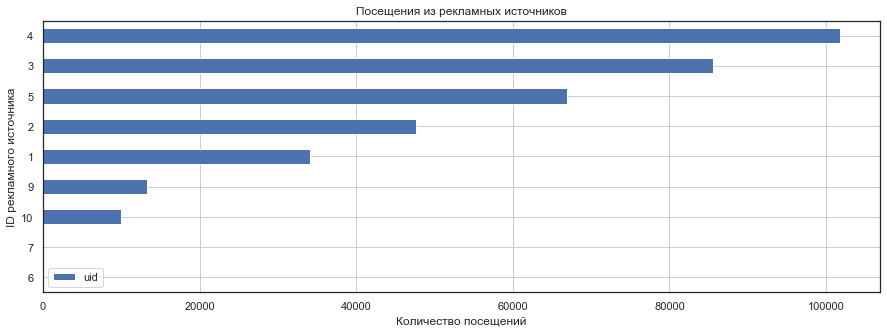

In [195]:
(visits.groupby('source_id').agg({'uid': 'count'}).sort_values('uid')
 .plot(y='uid', kind='barh', title='Посещения из рекламных источников', grid=True, figsize=(15, 5)))
plt.xlabel('Количество посещений')
plt.ylabel('ID рекламного источника')
plt.show()

При том, что на источник 3 уходило около 40 % бюджета маркетинга, а на источник 4 в два раза меньше, именно источник 4 дал больше посетителей сайта, чем источник 3. Остальные источники имеют долю посетителей примерно соответствующую доле маркетинговых трат на них.
Теперь рассмотрим изменение трат на маркетинг во времени для каждого рекламного источника, построив соответствующий график.

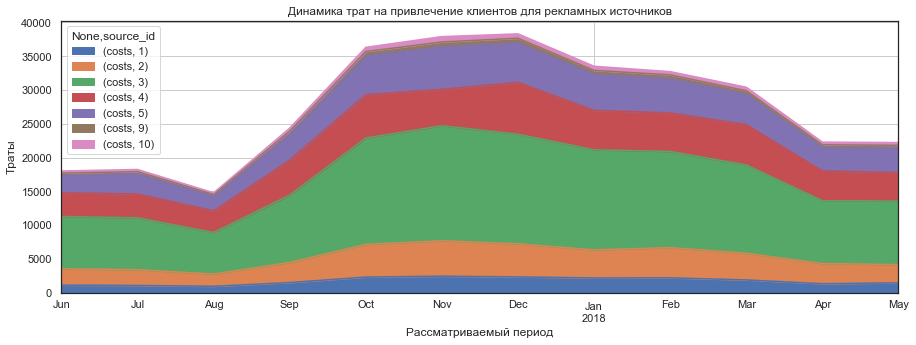

In [196]:
costs['month'] = costs['dt'].astype('datetime64[M]')
(costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).unstack().plot
 .area(title='Динамика трат на привлечение клиентов для рекламных источников', grid=True, figsize=(15, 5)))
plt.xlabel('Рассматриваемый период')
plt.ylabel('Траты')
plt.show()

С августа 2017 были значительно увеличены расходы на источник 3 с пиком в ноябре, дальше траты на него постепенно снижались. Но на протяжении всего периода на источник 3 расходовалась большая часть маркетингового бюджета. Траты на остальные источники были распределены более равномерно на протяжении всего периода.

#### 2.3.2 Стоимость привлечения одного покупателя (CAC)<a name="cac"></a>
Чтобы определить сколько стоило привлечение одного покупателя в разрезе рекламных источников, нужно узнать из какого источника они пришли. Этой информации нет в таблице с заказами, поэтому воьзьмем ее из таблицы с посещениями: отсортируем ее по дате посещения, а затем сгруппируем по id пользователя и для каждого из них найдем первый рекламный источник, из которого пользователь попал на сайт. Полученную таблицу присоединяем к таблице с заказами по колонке uid.

In [197]:
first_source = visits.sort_values(by='start_ts').groupby('uid').agg({'source_id': 'first'}).reset_index()
orders = orders.merge(first_source, on='uid')

Теперь получим суммарные траты на каждый рекламный истоник: соответствующую таблицу группируем по id источника и для каждого из них рассчитываем затраты. Таблица с заказами также группируем по id рекламного источника и для каждого из них выводим количество уникальных пользователей. Затем обе полученные таблицы соединяем по колонке source_id. В результирующей таблице за весь период для каждого рекламного источника указаны траты на него и количество покупателей, пришедших из него. Чтобы посчитать стоимость привлечения одного покупателя для каждого источника разделим затраты на количество пользователей. Полученные значения сохраним в колонке cost_one_user, по этой колонке отсортируем таблицу и выведем ее.

In [198]:
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
users_costs = (orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index())
users_costs.columns = ['source_id', 'users_amount']
users_costs = users_costs.merge(costs_by_source, on='source_id', how='left')
users_costs['cac'] = users_costs['costs'] / users_costs['users_amount']
users_costs = users_costs.fillna(0)
users_costs.sort_values('users_amount', ascending=False)

,source_id,users_amount,costs,cac
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479
1,2,3506,42806.04,12.209367
0,1,2899,20833.27,7.186364
7,10,1329,5822.49,4.381106
6,9,1088,5517.49,5.071222
5,7,1,0.00,0.000000


Дороже всего стоило привлечение одного покупателя из рекламных источников 3 и 2 - больше 12 условных единиц. Примерно по 7 условных единиц стоило привлечение одного покупателя из источников 5 и 1. Из источников 4, 9 и 10 привлечение одного покупателя стоило 4-6 условных единиц.

#### 2.3.3 Окупаемость маркетинговых трат (ROMI)<a name="romi"></a>
Теперь посчитаем на сколько окупились расходы на маркетинг (ROMI). Для этого снова используем когортный анализ. В таблицу monthly_costs сохраняем сгруппированную по месяцам таблицу с раходами, где для каждого месяца считаем суммарные расходы. Полученную таблицу присоединяем к ранее сохраненной таблице с когортами report по месяцам и сохраняем как report_new.

In [199]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum'})
report_new = report.merge(monthly_costs, left_on='first_order_month', right_on='month')
report_new.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0


Рассчитаем стоимость привлечения одного клиента (CAC) для каждого месяца жизни когорт, для этого рекламные расходы за этот месяц разделим на количество пользователей в когорте и сохраним в колонке cac.

In [200]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


Окупаемость (ROMI) каждой когорты за каждый месяц ее жизни посчитаем, разделив ltv на cac, и сохраним в новой колонке. На основе этой таблицы сделаем сводную, где индексами будут когорты, колонками возраст когорты, а значениями среднее romi. Выведем эту таблицу как тепловую карту.

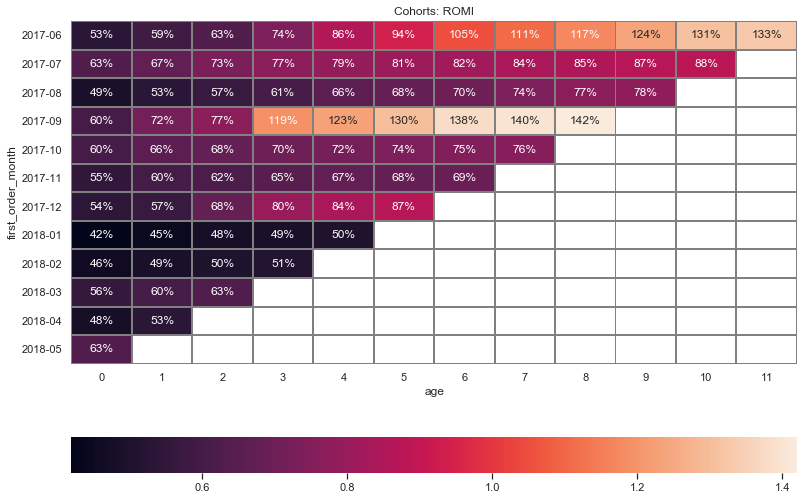

In [201]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output_romi_cum = output_romi.cumsum(axis=1).round(2)
yticks_romi = output_romi_cum.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
(sns.heatmap(output_romi_cum, annot=True, fmt='.0%', linewidths=1, linecolor='gray', yticklabels=yticks_romi,
             cbar_kws = dict(use_gridspec=False, location='bottom')))
plt.show()

Усредненная когорта начинает окупаться только после 11 месяца жизни. Если рассматривать когорты по отдельности, то среди проживших как минимум 6 месяцев к этому сроку окупилась только одна. Окупаемсоть остальных составила от 58 до 87 %.

Маркетинговые метрики показали, что на протяжении всего периода основной упор делался на привлечение покупателей из 3 источника, что дало результат, но оказалось не самым эффективным использованием средств. Источник 4 дал столько же покупателей, а потрачено на него было в два раза меньше. Это и медленный рост ltv повлияло на окупаемость: к полугоду жизни из шести когорт затраты на привлечение покупателей окупились только в двух.

## 3 Вывод<a name="conclusion"></a>
Изучив данные о посещениях, заказах и маркетинговых расходах сервиса Яндекс.Афиша за июнь 2017 - конец мая 2018 года можно сделать следующие выводы:
> - По графикам, показывающим изменение количества уникальных пользователей сайта во времени, и средним значениям количества уникальных пользователей за весь период видно, что пользователей с устройствами desktop примерно в три раза больше, чем пользователей с устройствами touch. И это соотношение не сильно изменялось за весь рассматриваемый период. В таком же соотношении находятся и показатели среднего количества посещений сайта в день.  Также нужно отметить, аномальную длину пользовательской сессии, которая встречается чаще всех остальных значений - 1 минута. Это относится и к устройствам desktop и к устройствам touch. При этом средний коэффициент удержания пользователя по всем когортам к полугоду их жизни не превышает 4 %. Как мне кажется для понимания этих показателей необходимо исследовать источник прихода таких пользователей на сайт;
> - Почти половина маркетинговых трат была израсходована на привлечение клиентов из рекламного источника с id 3. И это увеличило количество уникальных пользователей сайта в месяц. График изменения месячных расходов на этот рекламный источник за весь период практически идентичен графику изменения количества уникальных пользователей в месяц с устройствами desktop. Но эти траты были сравнительно неэффективны: за всё время из источника 3 было привлечено 10473 покупателя при CAC = 13.5 условных единиц, а из источника 4 пришло 10296 покупателей при CAC = 5.9. То есть при сопоставимом числе покупателей, пришедших из этих источников, на привлечение одного покупателя из источника 4 было потрачено в два раза меньше средств. Также обращают на себя внимание источник 5 (6931 покупатель, CAC = 7.5) и источник 2 (3506 покупателей, CAC = 12.2). В этих случаях для более эффективного расходования маркетинговых средств нужно рассмотреть сокращение трат на источники 3 и 2 и увеличение трат на источники 4 и 5.
> - Продуктовые метрики показывают, что на конец рассматриваемого периода тренд это снижение количества уникальных пользователей сайта, соответственно уменьшается и количество посещений. Потенциалом здесь является увеличение количества людей, возвращающихся на сайт, так как большинство пользователей заходит только один раз. Их удержанию могла бы поспособствовать например подписка на рассылку с датами старта продаж билетов на новые, интересующие пользователей, мероприятия;
> - Метрики продаж показывают в рассматриваемом периоде уменьшение времени от первого посещения сайта до первой покупки, что говорит о понятности интерфейса пользователям. Но также это можно интерпретировать так, что пользователи приходят за определенными билетами и не изучают другие мероприятия. Средний чек за рассматриваемый период находился в диапазоне от 4 до 6 условных единиц и снижался последние два месяца. Среди покупателей также очень низкий процент тех, кто совершает повторные покупки, что подтверждается очень скромными значениями количества покупок, приходящихся на одного покупателя, и величины выручки, получаемой с одного покупателя (LTV). Для большинства покупателей за рассматриваемый период LTV меньше 10 условных единиц;
> - О неэффективности маркетинговых вложений было сказана выше, это стало одной из причин их медленной окупаемости. Маркетинговая метрика показала, что за рассматриваемый период для большинства покупателей эти расходы еще не окупились;
> - Из 6 когорт посетителей с временем жизни не менее полугода наиболее перспективной является когорта 2017-06. В 11-м месяце ее жизни 4.5 % от ее состава пользовались сайтом. Из 6 когорт покупателей с временем жизни не менее полугода наиболее перспективными являются когорты 2017-06 и 2017-09. У этих когорт наибольший LTV и только у них затраты на привлечение покупателей окупились.